Import Dataset

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [123]:
train = pd.read_csv('D:/Madani/Portofolio Data Science/studi_case_titanic_survival/Case Study Chapter 2 Topic 6_ Data Train.csv')
test = pd.read_csv('D:/Madani/Portofolio Data Science/studi_case_titanic_survival/Case Study Chapter 2 Topic 6_ Data Test.csv')

In [124]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [125]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [126]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [127]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [128]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [129]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Exploratory Data Analysis (EDA)

In [130]:
def bar_chart(column, title=None, xlabel=None, ylabel=None):
    dataset = train[column].value_counts()
    index = dataset.index
    value = dataset.values

    fig = plt.figure(figsize=(7,5))
    plt.bar(index, value, color='orange', width=0.5)

    if title:
        plt.title(title)
    if xlabel:
        plt.xlabel(xlabel)
    if ylabel:
        plt.ylabel(ylabel)

    plt.show()

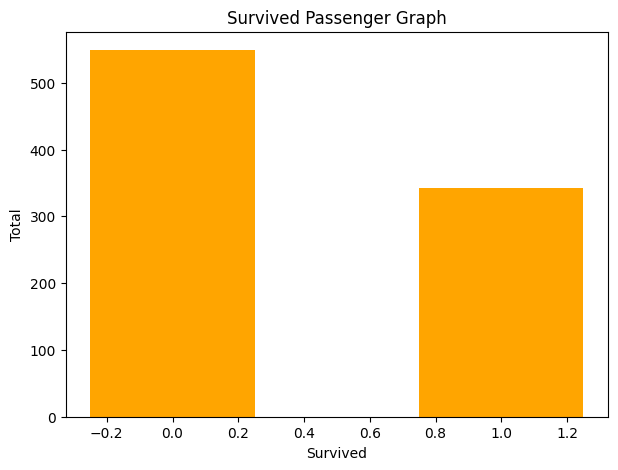

In [131]:
bar_chart('Survived', 'Survived Passenger Graph', 'Survived', 'Total')

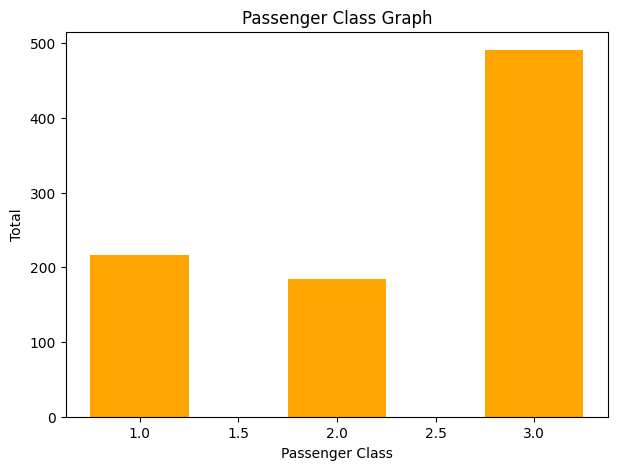

In [132]:
bar_chart('Pclass', 'Passenger Class Graph', 'Passenger Class', 'Total')

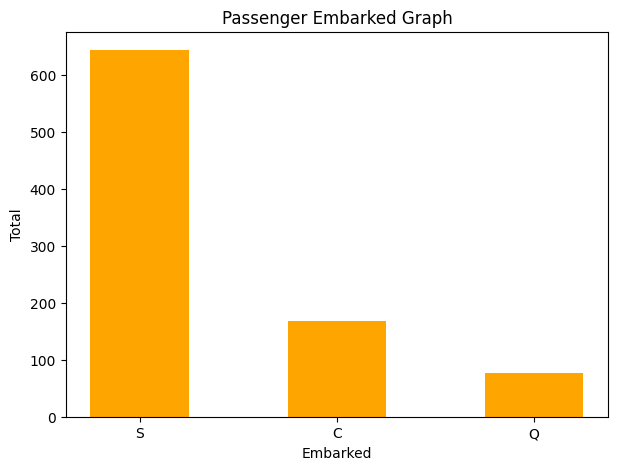

In [133]:
bar_chart('Embarked', 'Passenger Embarked Graph', 'Embarked', 'Total')

In [134]:
def group_barchart(column):
    survived = train.groupby(['Survived', column]).count()['PassengerId'].reset_index()
    g = sns.catplot(
        data=survived, kind='bar', 
        x='Survived', y='PassengerId',
        hue=column, palette='dark')

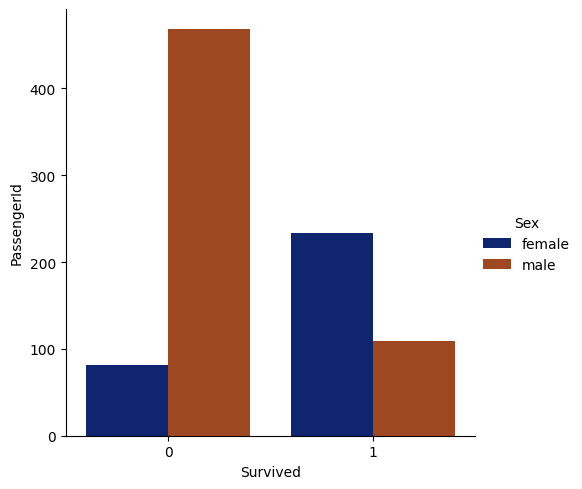

In [135]:
group_barchart('Sex')

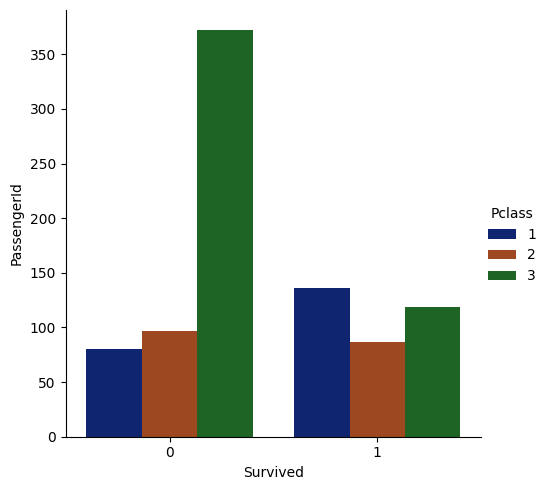

In [136]:
group_barchart('Pclass')

In [137]:
def histogram(column, title=None, xlabel=None, ylabel=None):
    fig, ax = plt.subplots(figsize=(7,5))
    ax.hist(train[column])

    if title:
        plt.title(title)
    if xlabel:
        plt.xlabel(xlabel)
    if ylabel:
        plt.ylabel(ylabel)

    plt.show()

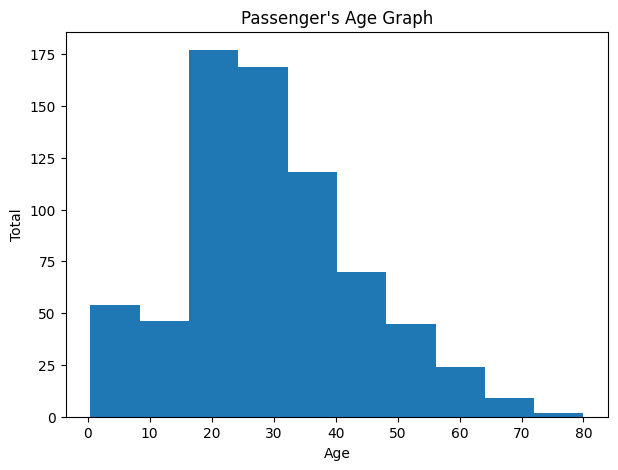

In [138]:
histogram('Age', 'Passenger\'s Age Graph', 'Age', 'Total')

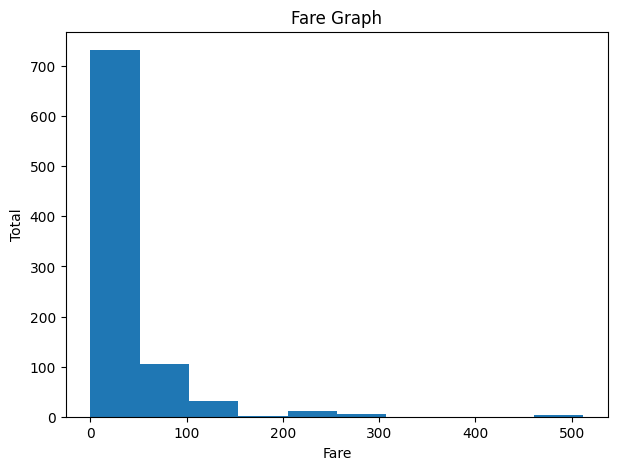

In [139]:
histogram('Fare', 'Fare Graph', 'Fare', 'Total')

Data Pre-Processing

In [140]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [141]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [142]:
train['Embarked'] = train['Embarked'].fillna(train['Embarked'].mode()[0])
train['Age'] = train['Age'].fillna(train['Age'].mean())

In [143]:
test['Fare'] = test['Fare'].fillna(test['Fare'].mean())
test['Age'] = test['Age'].fillna(test['Age'].mean())

In [144]:
train = train.drop(['Cabin'], axis=1)
test = test.drop(['Cabin'], axis=1)

In [145]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [146]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64